## Data Engineering
-  Uses Pandas to read in the measurement and station CSV files as DataFrames.
-  Inspects the data for NaNs and missing values and replaces them with 0 values.
-  Saves the cleaned CSV files with the prefix clean_.



# Database Engineering

-  Uses Pandas to read the cleaned measurements and stations CSV data.
-  Uses the SQLAlchemy engine and connection string to create a database called hawaii.sqlite.
-  Uses the declarative_base and creates ORM classes for each table.
-  Creates the tables in the database using create_all.

# Climate Analysis


In [532]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
%matplotlib inline

/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Created an engine to connect to your sqlite database


In [533]:
engine = create_engine("sqlite:///measurement.sqlite", echo=False)

# Used automap_base() to reflect your tables into classes

In [534]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [535]:
Station = Base.classes.measurement

In [536]:
session = Session(engine)

In [537]:
Station.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [538]:
measurement = Base.classes.measurement
Stations = Base.classes.station

In [539]:
session = Session(engine)

In [540]:
measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [541]:
from sqlalchemy import func

In [542]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [543]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [544]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [545]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (3, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (4, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (5, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)]

# Precipitation Analysis
- Design a query to retrieve the last 12 months of precipitation data.
- Select only the date and prcp values.
- Load the query results into a Pandas DataFrame and set the index to the date column.
- Plot the results using the DataFrame plot method

In [546]:
prev_year = dt.date.today() - dt.timedelta(days=365)


In [576]:
today = dt.date.today

In [547]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

In [548]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)
df.tail()

,date,precipitation
date,,
2017-08-17,2017-08-17,0.13
2017-08-19,2017-08-19,0.09
2017-08-21,2017-08-21,0.56
2017-08-22,2017-08-22,0.50
2017-08-23,2017-08-23,0.45


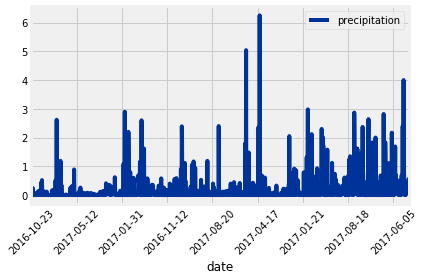

In [549]:
df.plot(x_compat=True, color='#003399') 
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('rain_station.png')

# Station Analysis
- Design a query to calculate the total number of stations.
- Design a query to find the most active stations.
- List the stations and observation counts in descending order
- Which station has the highest number of observations?
- Design a query to retrieve the last 12 months of temperature observation data (tobs).
- Filter by the station with the highest number of observations.
- Plot the results as a histogram with bins=12.

In [550]:
session.query(measurement.station, func.sum(measurement.station))\
.group_by(measurement.station).all()


[('USC00511918', 0.0),
 ('USC00513117', 0.0),
 ('USC00514830', 0.0),
 ('USC00516128', 0.0),
 ('USC00517948', 0.0),
 ('USC00518838', 0.0),
 ('USC00519281', 0.0),
 ('USC00519397', 0.0),
 ('USC00519523', 0.0)]

In [551]:
stationcount = session.query(measurement).distinct(measurement.station).group_by(measurement.station).count()
stationcount

9


- List the stations and observation counts in descending order
- Which station has the highest number of observations?


In [552]:
session.query(measurement.station, func.count(measurement.tobs))\
.group_by(measurement.station)\
.order_by(func.count(measurement.tobs).desc()).all()


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]


- Choose the station with the highest number of temperature observations.
- Design a query to retrieve the last 12 months of temperature observation data (tobs)

In [553]:
results = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= prev_year).all()

In [554]:
df = pd.DataFrame(results, columns=['Station', 'Temperature'])
df.head()

,Station,Temperature
0,USC00519281,74.0
1,USC00519281,75.0
2,USC00519281,76.0
3,USC00519281,73.0
4,USC00519281,76.0



- Plot the results as a histogram with bins=12.

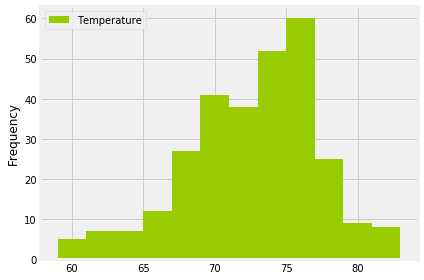

In [555]:
df.plot.hist(bins=12, color='#99cc00')
plt.tight_layout()
plt.show()
plt.savefig('station_temp.png')

# Temperature AnalysisTemperature Analysis
- Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
- Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
- Plot the min, avg, and max temperature from your previous query as a bar chart.
- Use the average temperature as the bar height.
- Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [556]:
date = dt.datetime(2018, 5, 31)

In [557]:
def calc_temps(startdate, enddate):
    minimum = session.query(func.min(measurement.tobs)).filter(measurement.date > startdate)\
                             .filter(measurement.date < enddate).all()
    maximum = session.query(func.max(measurement.tobs)).filter(measurement.date > startdate)\
                             .filter(measurement.date < enddate).all()
    average = session.query(func.avg(measurement.tobs)).filter(measurement.date > startdate)\
                             .filter(measurement.date < enddate).all()
    return minimum, maximum, average

In [558]:
trip = calc_temps("2016-05-12","2016-05-29")

In [559]:
trip

([(68.0)], [(81.0)], [(75.26666666666667)])

In [573]:
df = pd.DataFrame({'tmin': trip[0][0], 'tmax': trip[1][0], 'avg': trip[2][0]}, columns=['tmin','avg','tmax'])
df

,tmin,avg,tmax
0,68.0,75.266667,81.0


- Plot the min, avg, and max temperature from your previous query as a bar chart.
- Use the average temperature as the bar height.
- Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


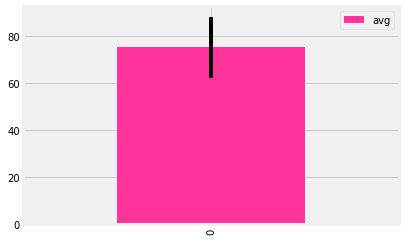

In [574]:
error = df['tmax'].sub(df['tmin'])
df.plot.bar(y='avg',yerr=error, color='#ff3399')
plt.savefig('average_trip_temperature.png')

# Step 4 - Climate App
- Now that you have completed your initial analysis, design a Flask api based on the queries that you have just developed.

Routes
- /api/v1.0/precipitation
    - Query for the dates and precipitation observations from the last year.
    - Convert the query results to a Dictionary using date as the key and tobs as the value.
    - Return the json representation of your dictionary.
- /api/v1.0/stations
    - Return a json list of stations from the dataset.
    - /api/v1.0/tobs
- Return a json list of Temperature Observations (tobs) for the previous year
- /api/v1.0/# IMPORTING FLASK TO TRANSFORM TO API
    - Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
    - When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
    - When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date incl

In [589]:

#Flask
from flask import Flask, jsonify

app = Flask(__name__)

In [590]:
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/stations</br>"
        f"/api/v1.0/<start></br>"
        f"/api/v1.0/<start>/<end>"
    )

- /api/v1.0/precipitation
    - Query for the dates and precipitation observations from the last year.

In [591]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    dict = {}
    data = df[(df.date >= str(prev_year)) & (df.date <= str(today))].groupby(['date']).sum()
    for index, row in df.iterrows():
        dict[row.date] = row.prcp
    return jsonify(dict)


In [592]:

# /api/v1.0/stations
# Return a json list of stations from the dataset.
@app.route("/api/v1.0/stations")
def stations():
    stations = list(df.measurement.unique())
    return jsonify(stations)

In [593]:
# /api/v1.0/tobs
# Return a json list of Temperature Observations (tobs) for the previous year
@app.route("/api/v1.0/tobs")
def tobs():
    results = session.query(measurement.date, measurement.tobs).filter(measurement.date >= prev_year).all()
    temp_results = list(np.ravel(results))

    return jsonify(temp_results)


In [ ]:
@app.route("/api/v1.0/<start>")
def temp_start(start):
    temps = df[(df.date >= start)]
    min_temp = temps.tobs.min()
    max_temp = temps.tobs.max()
    mean_temp = temps.tobs.mean()
    return jsonify({"min_temp": int(min_temp), "max_temp": int(max_temp), "mean_temp": int(mean_temp)})

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def temp_range(start, end):
    temps = df[(df.date >= start) & (df.date <= end)]
    min_temp = temps.tobs.min()
    max_temp = temps.tobs.max()
    mean_temp = temps.tobs.mean()
    return jsonify({"min_temp": int(min_temp), "max_temp": int(max_temp), "mean_temp": int(mean_temp)})

In [ ]:

# With debug=True, Flask server will auto-reload 
# when there are code changes
if __name__ == '__main__':
	app.run(debug=False)